<p style="color:black;background-color:#FFD700;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px dotted blue;font-size:22px"> 🦉DATA VISUALISATION & CUSTOMER SEGMENTATION WITH K-MEANS 🦉<span style='font-size:28px; background-color:blue '></span></p>
<center><img src="https://www.segmentify.com/wp-content/uploads/2021/08/Top-Customer-Segmentation-Examples-every-Marketer-Needs-to-Know.png" style='border-radius:30px'>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h3 style="padding: 8px;color:white"><b>1 | Introduction </b></h3>

**Hello kagglers 🖐!!**<br>

Today i'll be sharing with you a very interesting topic about Data segmentation. My goal is to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.

<h3 style="padding: 8px;color:#C71585"><b>✨ Data Description 📁</b></h3>

In this work we will use a dataset of 200 customers that include the following attributs:

* **CustomerID**-Unique ID assigned to the customer.
* **Gender**-Gender of the customer
* **Age**-Age of the customer
* **Annual Income (k$)**-Annual Income of the customee
* **Spending Score (1-100)**-Score assigned by the mall based on customer behavior and spending nature

<h3 style="padding: 8px;color:#C71585"><b>✨ Tasks and notebook goal 🔮</b></h3>

The aim of this work, is to takle the following things:

* **Univariate and multivariate Data visualisation**
* **Data pre-processing for K-Means clustering**
* **Building a K-Means clustering algorithm**
* **The metrics used to evaluate the performance of a clustering model**
* **Visualizing clusters built**
* **Interpretation and analysis of clusters built**

Before we get started, let's see some usefull definitions that are used in this notebook.

<h3 style="padding: 8px;color:#C71585"><b>✨ Usefull definitions used in this notebook 🎈</b></h3>

### **What is Customer Segmentation?**
Customer Segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. Customers are segmented according to their similarities in behavior and habits.

### **k-means clustering**
K-means clustering is an unsupervised learning technique to classify unlabeled data by grouping them by features, rather than pre-defined categories. The variable K represents the number of groups or categories created. The goal is to split the data into K different clusters and report the location of the center of mass for each cluster. Then, a new data point can be assigned a cluster (class) based on the closed center of mass.

### **Principal component analysis(PCA)**

The principal components of a collection of points in a real coordinate space are a sequence of **p** unit vectors, where the **i-th** vector is the direction of a line that best fits the data while being orthogonal to the first **i-1** vectors. Here, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line. These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

<center><img src="https://miro.medium.com/max/596/1*QinDfRawRskupf4mU5bYSA.png"></center>

### **Elbow method (clustering)**

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. 

<center><img src="https://miro.medium.com/max/1340/1*RnvrdhlUxHWss3vOffHT5g.png"></center>

### **Silhouette score**

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.[1] It was proposed by Belgian statistician Peter Rousseeuw in 1987.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

<center><img src="https://www.researchgate.net/profile/Mark-Stamp/publication/283005507/figure/fig3/AS:962238319964161@1606426901265/Silhouette-coefficient-example.gif"></center>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h3 style="padding: 8px;color:white"><b>2 | Import Necessary Librairies </b></h3>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv
/kaggle/input/clustersimage/clusters.PNG


<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h3 style="padding: 8px;color:white"><b>3 | Select color palette </b></h3>

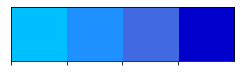

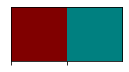

In [2]:
# --- Create List of Color Palletes ---
blue_palette=['#00bfff','#1e90ff','#4169e1','#0000cd']
mixt_palette = ['#800000', '#008080']

# --- Plot Color Palletes --
sns.palplot(blue_palette)
sns.palplot(mixt_palette)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h3 style="padding: 8px;color:white"><b>4 | Data Loading and Overview </b></h3>

In [3]:
df=pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head(10).style.background_gradient(cmap='plasma').set_properties(**{'font-family': 'Segoe UI'}).hide_index() 

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3
10,Female,30,19,72


In [4]:
#summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<div class="alert alert-block alert-info" style='color:black'>
<p> <b>📌 There are five variables in the dataset, four of theme are float and one is object. CustomerID is the unique identifier of each customer in the dataset, we can drop this variable. It doesn't provide us with any useful information.</b></p>
<p> <b>📌 The dataset doesn't have any missing values.</b></p>
</div>

In [5]:
#Drop CustomerID from dataset
df.drop('CustomerID',axis=1,inplace=True)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h3 style="padding: 8px;color:white"><b>5 | Data Visualization </b></h3></div>
    <h3 style="padding: 8px;color:#C71585"><b>4.1 | Histogramme & Boxplot: Visualization of continious variables  </b></h3>

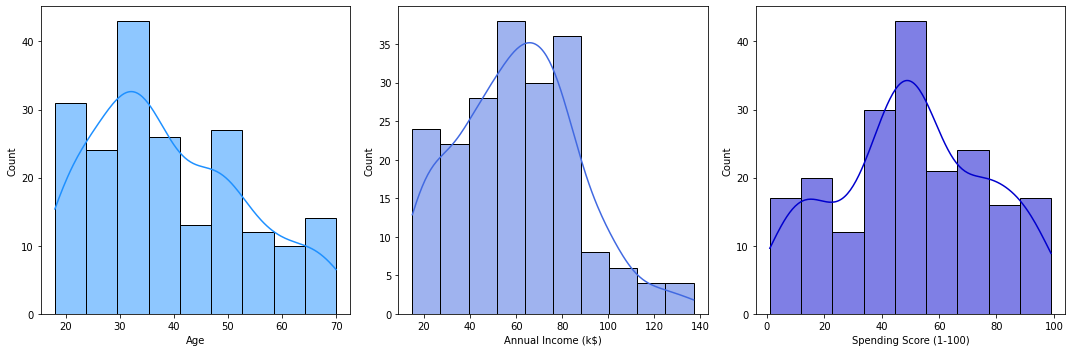

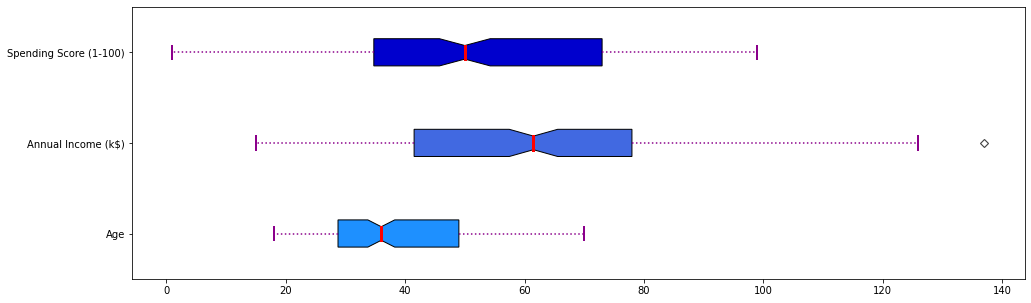

In [6]:
#------------------CREAT HISTOGRAME---------------------------------
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.histplot(x="Age", data=df, color=blue_palette[1],kde=True,ax=axes[0])
sns.histplot(x="Annual Income (k$)", data=df, color=blue_palette[2],kde=True,ax=axes[1])
sns.histplot(x="Spending Score (1-100)", data=df, color=blue_palette[3],kde=True,ax=axes[2])
f.tight_layout()
plt.show()

# --------------CREAT BOXPLOT----------------------------------------
features= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
 
fig = plt.figure(figsize =(16, 5))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(df[features], patch_artist = True,
                notch ='True', vert = 0)
 
colors = [blue_palette[1], blue_palette[2] ,blue_palette[3]]
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['Age', 'Annual Income (k$)',
                    'Spending Score (1-100)'])

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

<div class="alert alert-block alert-info" style='color:black'>
<p> <b>📌 Most of customers have age between 30 and 35. And the average age is 39.</b></p>
<p> <b>📌 The average annual income is arround 61 K$.</b></p>
<p> <b>📌 Most of customers have an spending score between 45 and 55. The average spending score is arround 50.</b><b></p>
<p> <b>📌 There is only one outliers for the variable "Annual Income".</b><b></p>
</div>

<h3 style="padding: 8px;color:#C71585"><b>4.2 | Barplot & Pie-chart : Visualisation of the categorical variable "Gender"  </b></h3>

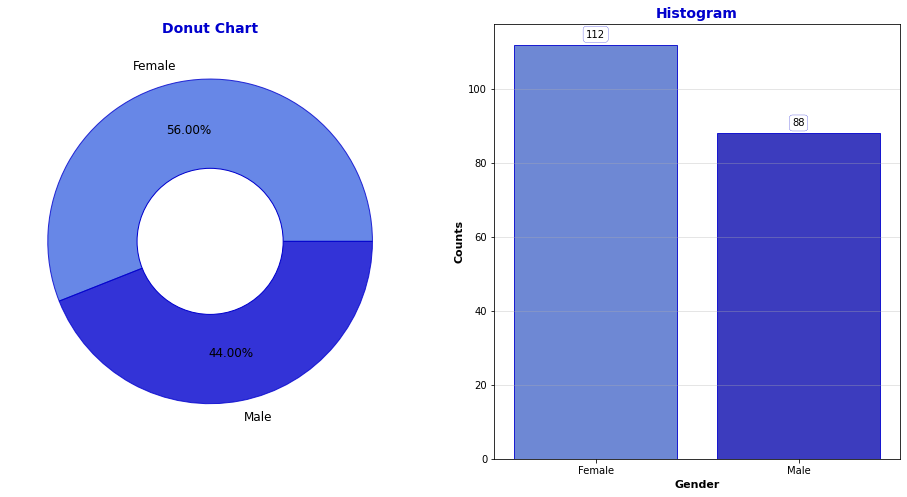

In [7]:

colors=[blue_palette[2],blue_palette[3]]
labels=['Female', 'Male']
counts=df['Gender'].value_counts().index


plt.figure(figsize=(16, 8))


# --- Donute Chart ---
plt.subplot(1, 2, 1)
plt.title('Donut Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=blue_palette[3])
plt.pie(df['Gender'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=blue_palette[3]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=blue_palette[3])
plt.gcf().gca().add_artist(centre)

# --- Barplot ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=blue_palette[3])
ax = sns.countplot(x='Gender', data=df, palette=colors, order=counts,
                   edgecolor=blue_palette[3], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+2,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=blue_palette[3], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Counts', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)

<div class="alert alert-block alert-info" style='color:black'>
<p><center><b>🔦🔦 As we can see 56% of customers are female, while 44% are mall.</b></center></p>
</div>

<h3 style="padding: 8px;color:#C71585"><b>4.3 | Marginal Histogram : visualizing the relationship between features</b></h3>

<h3 style="padding: 8px;color:black"><b>🎗 "Age" VS "Spending Score"</b></h3>

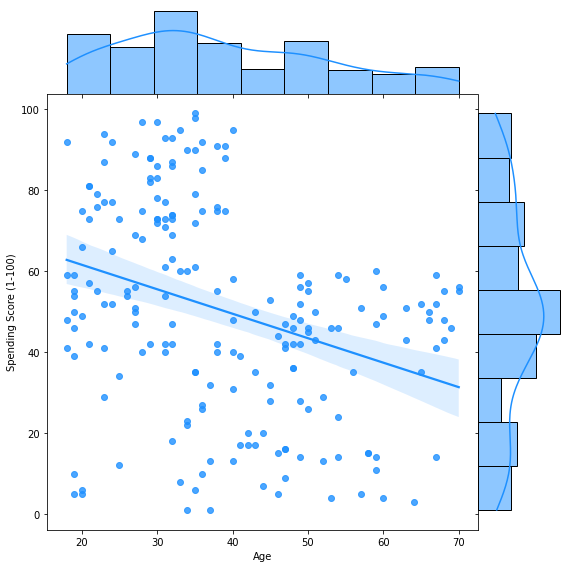

In [8]:
sns.jointplot(x="Age", y="Spending Score (1-100)",data=df, kind='reg',height=8, color=blue_palette[1],space=0)

<h3 style="padding: 8px;color:black"><b>🎗 "Age" VS "Annual Income"</b></h3>

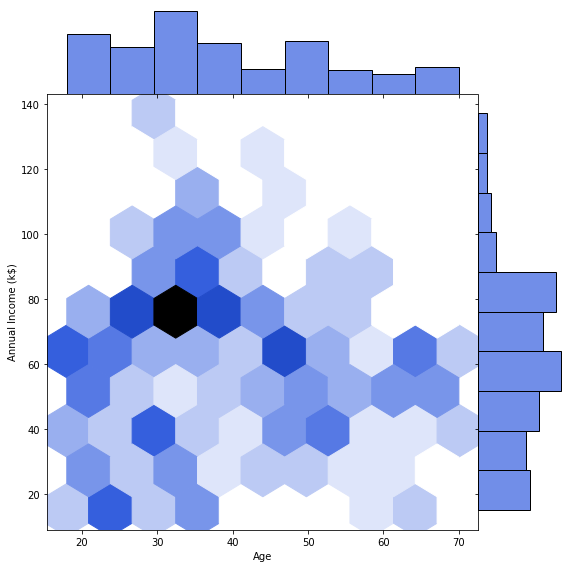

In [9]:
sns.jointplot(x=df["Age"], y=df["Annual Income (k$)"], kind='hex', color=blue_palette[2],height=8,ratio=5,space=0)

<h3 style="padding: 8px;color:black"><b>🎗 "Spending Score" VS "Annual Income"</b></h3>

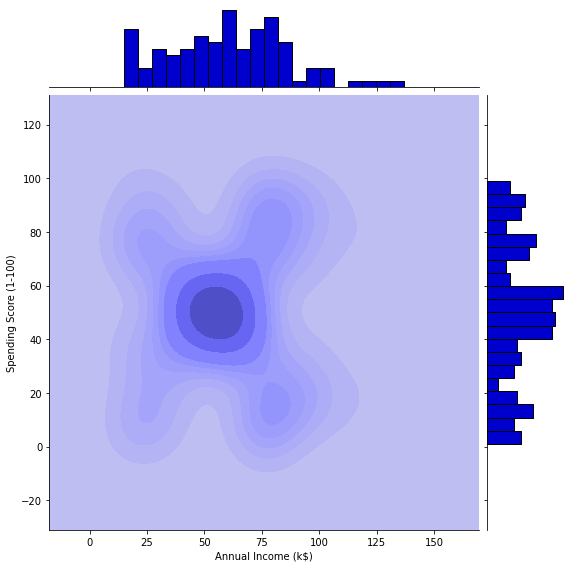

In [10]:
g = sns.JointGrid(data = df, height = 8, x = "Annual Income (k$)", y = "Spending Score (1-100)", space = 0.1)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, color = blue_palette[3])
g.plot_marginals(sns.histplot, color = blue_palette[3], alpha = 1, bins = 20);

<h3 style="padding: 8px;color:#C71585"><b>4.3 | Scatter plot  : visualizing the relationship with linear regression line of best fit</b></h3>

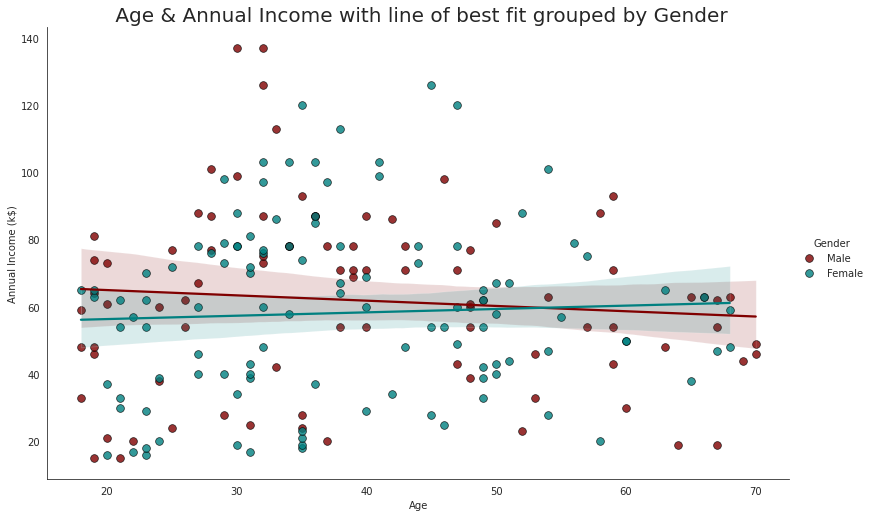

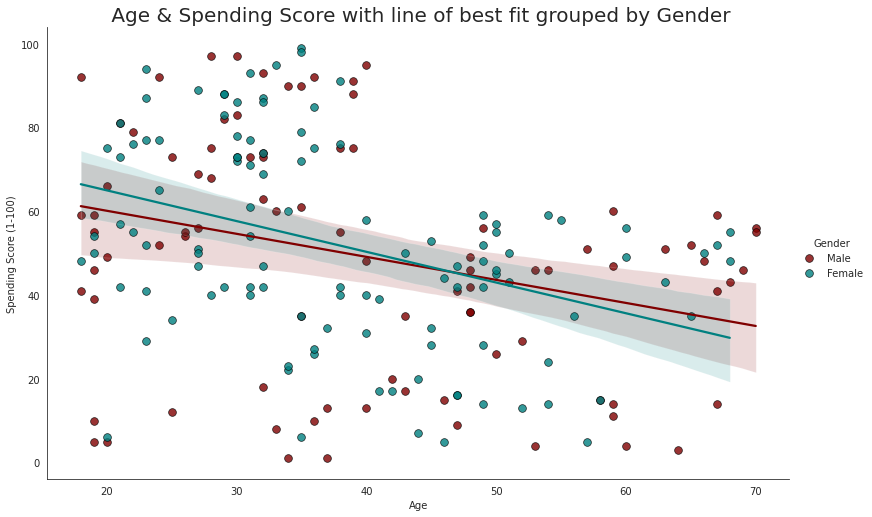

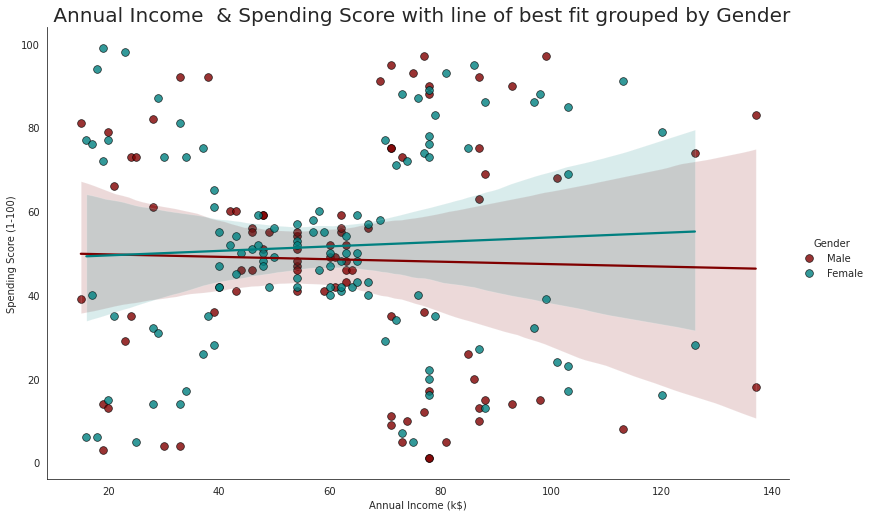

In [11]:
# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="Age", y="Annual Income (k$)", hue="Gender", data=df, 
                     height=7, aspect=1.6, robust=True, palette=mixt_palette, 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title(" Age & Annual Income with line of best fit grouped by Gender", fontsize=20)
plt.show()

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="Age", y="Spending Score (1-100)", hue="Gender", data=df, 
                     height=7, aspect=1.6, robust=True, palette=mixt_palette, 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title(" Age & Spending Score with line of best fit grouped by Gender", fontsize=20)
plt.show()

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df, 
                     height=7, aspect=1.6, robust=True, palette=mixt_palette, 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title(" Annual Income  & Spending Score with line of best fit grouped by Gender", fontsize=20)
plt.show()


<h3 style="padding: 8px;color:#C71585"><b>4.3 | Heatmapt  : visualizing the correlation between feaures</b></h3>

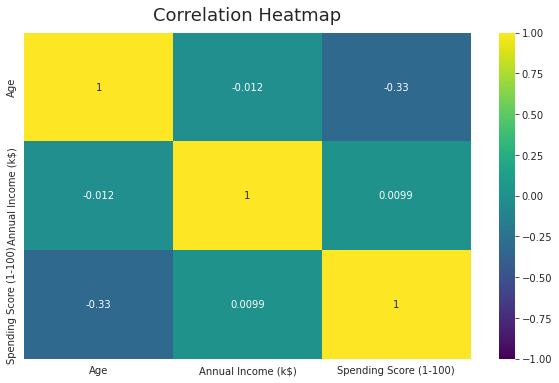

In [12]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

<div class="alert alert-block alert-info" style='color:black'>
<p><center><b> 👓👓 Looking to the correlation matrix, we can clearly see that our variales are not strongly correlated. The highest correlation we noticed is beteen Age and Spending Score with 33% of correlation.</b></center></p>
</div>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h3 style="padding: 8px;color:white"><b> 6 | Data Pre-processing </b></h3></div>



Since gender is a categorial variable, it needs to be encoded and converted into numeric. All other variables will be scaled to follow a normal distribution before being fed into the model. We will standardize these variables with a mean of 0 and a standard deviation of 1.

<h3 style="padding: 8px;color:#C71585"><b>6.1 | Standardizing variables</b></h3>

First, lets standardize all variables in the dataset to get them around the same scale.

In [13]:
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
sd=StandardScaler()
features = df[col_names]
scaler = sd.fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head().style.background_gradient(cmap='plasma').set_properties(**{'font-family': 'Segoe UI'}).hide_index() 

Annual Income (k$),Age,Spending Score (1-100)
-1.738999,-1.424569,-0.434801
-1.738999,-1.281035,1.195704
-1.700830,-1.352802,-1.715913
-1.700830,-1.137502,1.040418
-1.662660,-0.563369,-0.395980


<h3 style="padding: 8px;color:#C71585"><b>6.2 | One-Hot Encoding</b></h3>
   

In [14]:
gender = df['Gender']
newdf = scaled_features.join(gender)
newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
newdf = newdf.drop(['Gender_Male'],axis=1)
newdf.head().style.background_gradient(cmap='plasma').set_properties(**{'font-family': 'Segoe UI'}).hide_index() 

Annual Income (k$),Age,Spending Score (1-100),Gender_Female
-1.738999,-1.424569,-0.434801,0
-1.738999,-1.281035,1.195704,0
-1.700830,-1.352802,-1.715913,1
-1.700830,-1.137502,1.040418,1
-1.662660,-0.563369,-0.395980,1


<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h3 style="padding: 8px;color:white"><b> 7 | Building the clustering model with k-means</b></h3></div>

<h3 style="padding: 8px;color:#C71585"><b>7.1 | Finding optimal number of clusters with Elbow Method</b></h3>

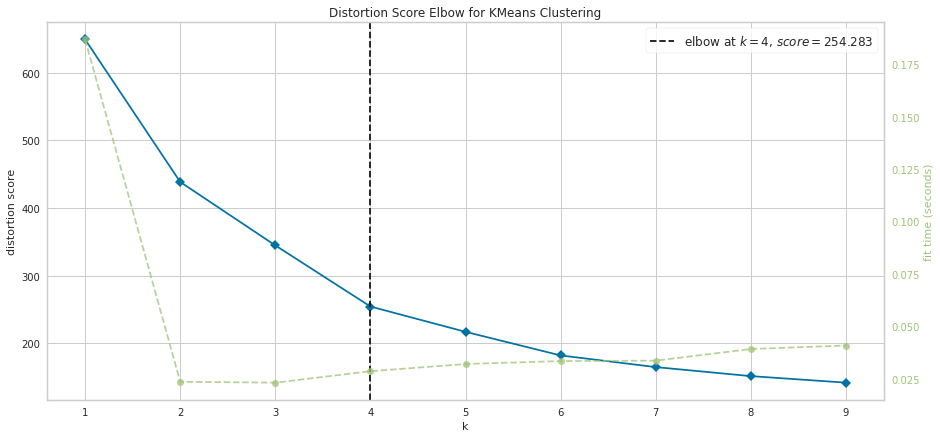

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500))

visualizer.fit(newdf)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

<div class="alert alert-block alert-info" style='color:black'>
<p><center><b> 📌📌 Using the elbow method We can observe that the optimal number of clusters is k=4. Now we can run a K-Means using as n_clusters the number 4.</b></center></p>
</div>

<h3 style="padding: 8px;color:#C71585"><b>7.2 | Implimentation of k-means & Silhouette coefficient metric</b></h3>

In [16]:
# First, build a model with 4 clusters

kmeans = KMeans(n_clusters = 4, init='k-means++',random_state=42)
kmeans.fit(newdf)

# Now, print the silhouette score of this model

print("silhouette_score is :",silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.35027020434653977


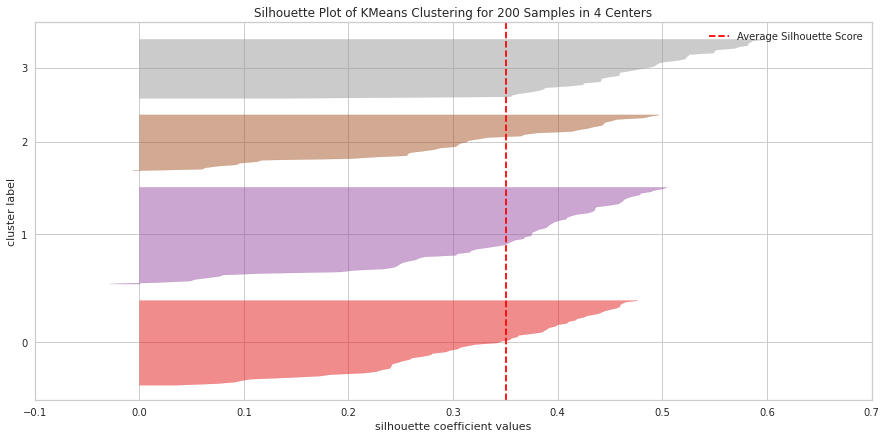

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer 
kmeans1 = KMeans(n_clusters = 4, init='k-means++',random_state=42)
visualizer = SilhouetteVisualizer(kmeans1,size=(1080, 500))

visualizer.fit(newdf)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

<div class="alert alert-block alert-info" style='color:black'>
<p><center><b> 📌📌 The silhouette score of this model is about 0.35. This isn't a bad model, but we can do better and try getting higher cluster separation.</b></center></p>
</div>

Before we try doing that, lets visualize the clusters we just built to get an idea of how well the model is doing.

<h3 style="padding: 8px;color:#C71585"><b>7.3 | Visualization of clusters built by the model</b></h3>

In [18]:
clusters = kmeans.fit_predict(df.iloc[:,1:])
newdf["label"] = clusters
newdf.head().style.background_gradient(cmap='plasma').set_properties(**{'font-family': 'Segoe UI'}).hide_index() 

Annual Income (k$),Age,Spending Score (1-100),Gender_Female,label
-1.738999,-1.424569,-0.434801,0,2
-1.738999,-1.281035,1.195704,0,2
-1.700830,-1.352802,-1.715913,1,1
-1.700830,-1.137502,1.040418,1,2
-1.662660,-0.563369,-0.395980,1,1


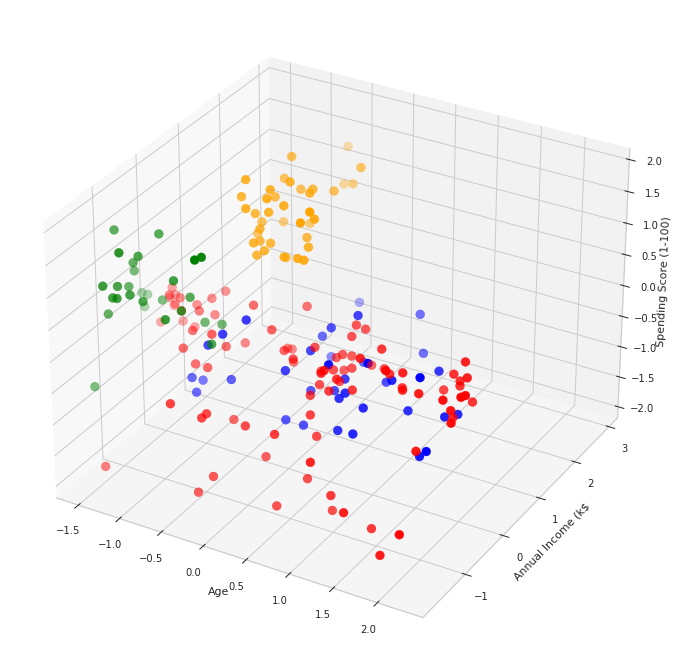

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf["label"] == 0], newdf["Annual Income (k$)"][newdf["label"] == 0], newdf["Spending Score (1-100)"][newdf["label"] == 0], c='blue', s=80)
ax.scatter(newdf.Age[newdf["label"] == 1], newdf["Annual Income (k$)"][newdf["label"] == 1], newdf["Spending Score (1-100)"][newdf["label"] == 1], c='red', s=80)
ax.scatter(newdf.Age[newdf["label"] == 2], newdf["Annual Income (k$)"][newdf["label"] == 2], newdf["Spending Score (1-100)"][newdf["label"] == 2], c='green', s=80)
ax.scatter(newdf.Age[newdf["label"] == 3], newdf["Annual Income (k$)"][newdf["label"] == 3], newdf["Spending Score (1-100)"][newdf["label"] == 3], c='orange', s=80)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$")
ax.set_zlabel("Spending Score (1-100)")
plt.show()

<div class="alert alert-block alert-info" style='color:black'>
<p><b> 📌 From the above plot, we can see that cluster separation isn't too great. The red points are mixed with the blue, and the green are overlapping the yellow.</b></p>
<p><b> 📌 This, along with the silhouette score shows us that the model isn't performing too well.</b></p><p><center><b> 
</div>

Now, lets create a new model that has better cluster separability than this one.

For this model, lets do some feature selection. We can use a technique called Principal Component Analysis (PCA).

PCA is a technique that helps us reduce the dimension of a dataset. When we run PCA on a data frame, new components are created. These components explain the maximum variance in the model. We can select a subset of these variables and include them into the K-means model.

<h3 style="padding: 8px;color:#C71585"><b>7.3 | Implimentation of PCA</b></h3>

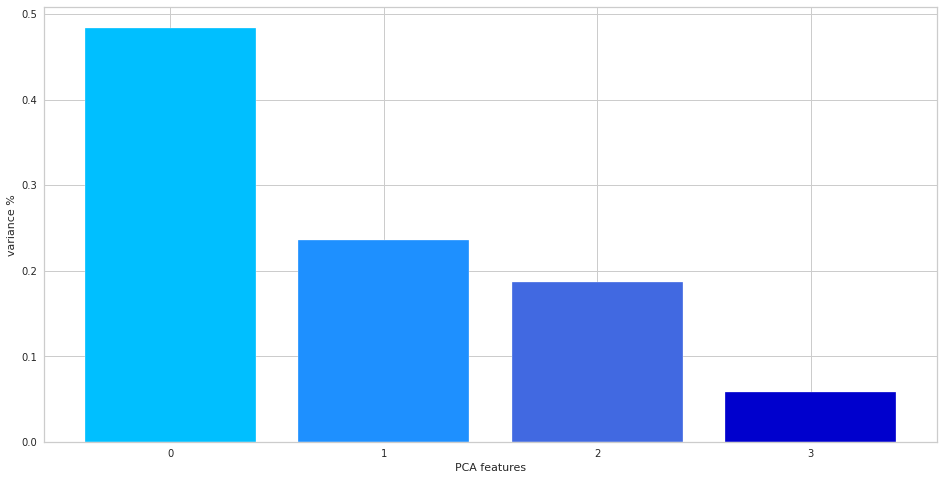

In [20]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)
features = range(pca.n_components_)
plt.figure(figsize=(16,8))
plt.bar(features, pca.explained_variance_ratio_, color=blue_palette[0:4])
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

<div class="alert alert-block alert-info" style='color:black'>
<p><b> 📌 This chart shows us each PCA component, along with it variance. </b></p>
<p><b> 📌 Based on this visualization, we can see that the first two PCA components explain more than 70% of the dataset variance. We can feed these two components into the model.</b></p><p><center><b> </div>

Let's build the model again with the first two principal components, and decide on the number of clusters to use.

<h3 style="padding: 8px;color:#C71585"><b>7.4 | Elbow Method for the new clustering model #model 2</b></h3>

Lets build the model again with the first two principal components, and decide on the number of clusters to use.

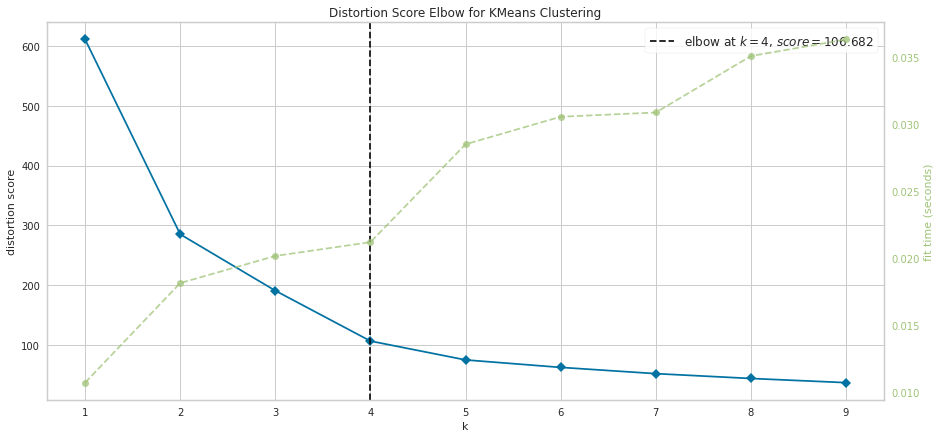

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500))

visualizer.fit(PCA_components.iloc[:,:2])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

<div class="alert alert-block alert-info" style='color:black'>
<p><b> 📌 It looks like the optimal number of clusters is 4. </b></p>
<p><b> 📌 We can calculate the silhouette score for this model with 4 clusters.</b></p><p><center><b> </div>

<h3 style="padding: 8px;color:#C71585"><b>7.4 | Silhouette coefficient metric for the new clustering model</b></h3>

In [22]:
model = KMeans(n_clusters=4, init='k-means++',random_state=42)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print("silhouette_score is :",silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean')) 

silhouette_score is : 0.5420675584602601


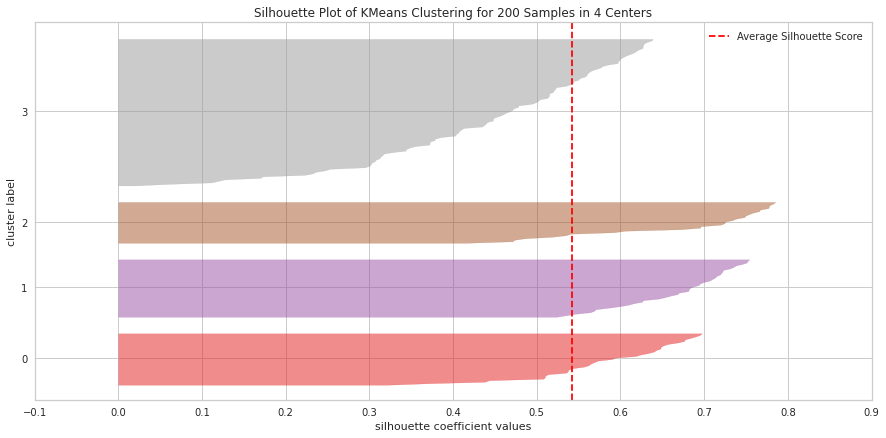

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
model1 = KMeans(n_clusters = 4, init='k-means++',random_state=42)
visualizer = SilhouetteVisualizer(model1,size=(1080, 500))
visualizer.fit(PCA_components.iloc[:,:2])    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure)    # Fit the data to the visualizer

<div class="alert alert-block alert-info" style='color:black'>
<p><b><center> 📌 The silhouette score of this model is 0.54, which is better than the previous model we created.</center></b></p>

<h3 style="padding: 8px;color:#C71585"><b>7.3 | Visualization of clusters built by the New model</b></h3>

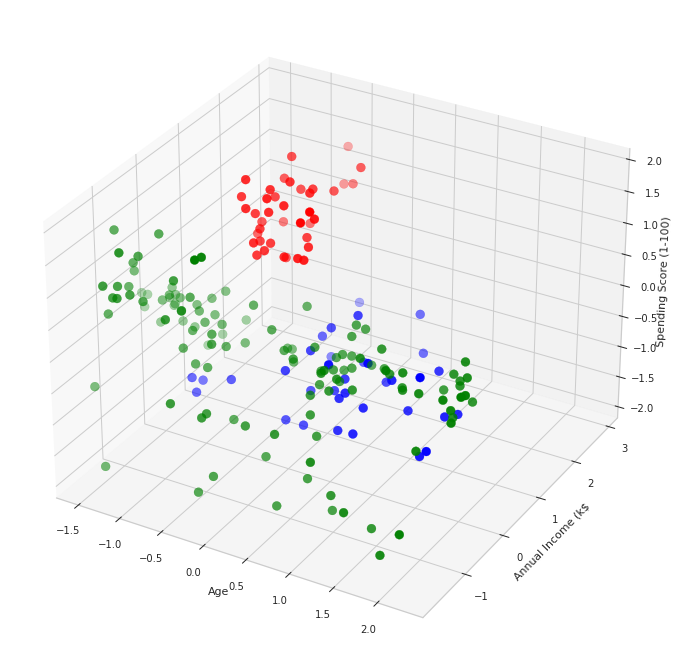

In [24]:
clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters
 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf["label"] == 0], newdf["Annual Income (k$)"][newdf["label"] == 0], newdf["Spending Score (1-100)"][newdf["label"] == 0], c='blue', s=80)
ax.scatter(newdf.Age[newdf["label"] == 1], newdf["Annual Income (k$)"][newdf["label"] == 1], newdf["Spending Score (1-100)"][newdf["label"] == 1], c='red', s=80)
ax.scatter(newdf.Age[newdf["label"] == 2], newdf["Annual Income (k$)"][newdf["label"] == 2], newdf["Spending Score (1-100)"][newdf["label"] == 2], c='green', s=80)
ax.scatter(newdf.Age[newdf["label"] == 3], newdf["Annual Income (k$)"][newdf["label"] == 3], newdf["Spending Score (1-100)"][newdf["label"] == 3], c='green', s=80)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$")
ax.set_zlabel("Spending Score (1-100)")
plt.show()

<h3 style="padding: 8px;color:#C71585"><b>7.4 | model1 VS model2</b></h3>

<div class="alert alert-block alert-info" style='color:black'>
<p><b><center> 📌 Since the silhouette score of the second model is a lot higher, we can pick the second model to go forward with our analysis.</center></b></p>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#C71585;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <h3 style="padding: 8px;color:white"><b> 8 | Cluster Analysis and customors segmentation </b></h3></div>

Now that we're done building these different clusters, lets try to interpret them and look at the different customer segments.

First, lets map the clusters back to the dataset and take a look at the head of the data frame.

In [25]:
df=pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df = df.drop(['CustomerID'],axis=1)

# map back clusters to dataframe

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head().style.background_gradient(cmap='plasma').set_properties(**{'font-family': 'Segoe UI'}).hide_index() 

Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
Male,19,15,39,2
Male,21,15,81,2
Female,20,16,6,3
Female,23,16,77,2
Female,31,17,40,3


In [26]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df.style.background_gradient(cmap='plasma').set_properties(**{'font-family': 'Segoe UI'}).hide_index() 

cluster,Age,Annual Income (k$),Spending Score (1-100)
0,41.685714,88.228571,17.285714
1,32.692308,86.538462,82.128205
2,24.821429,28.714286,74.250000
3,44.295918,49.438776,42.377551


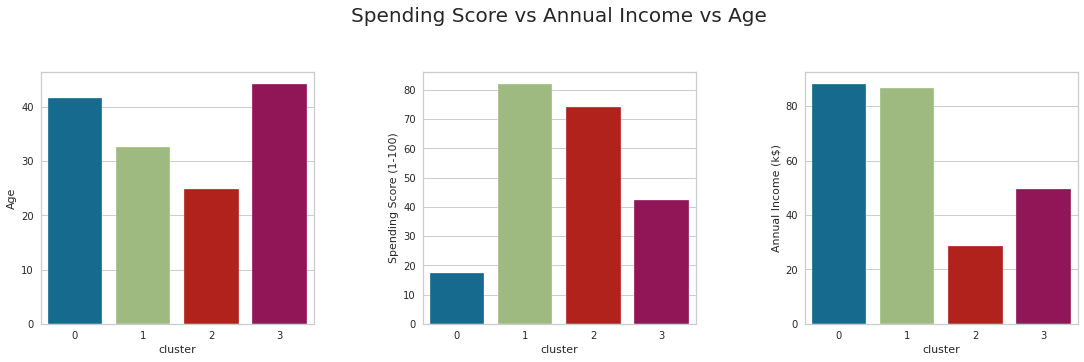

In [27]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.barplot(x='cluster',y='Age',data=avg_df ,ax=ax[0])
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df, ax=ax[1])
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df, ax=ax[2])
plt.suptitle('Spending Score vs Annual Income vs Age',fontsize=20)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.4)

fig.tight_layout()
plt.show()


In [28]:
df2 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
df2.head(8)

Gender
cluster Gender        
0       Female      15
        Male        20
1       Female      21
        Male        18
2       Female      14
        Male        14
3       Female      62
        Male        36

From the above visualisations we can observe the following things:

<span style="background-color:orange"><b>Cluster 0:<b></span>

* High average annual income, low average spending capacity.
* Mean age is around 40 and gender is predominantly male.
    
<span style="background-color:orange"><b>Cluster 1:<b></span>

* High average income, high spending score.
* Mean age is around 30 and gender is predominantly female.

<span style="background-color:orange"><b>Cluster 2:<b></span>

* Low average income, high spending score.
* Mean age is around 25 and gender is predominantly female.
    
<span style="background-color:orange"><b>Cluster 3:<b></span>

* Low to mid average income, average spending capacity.
* Mean age is around 50 and gender is predominantly female.


<center><img src="https://i.gifer.com/origin/46/46eae4c4ff91c03514a7096538740b42_w200.gif" style='border-radius:30px;width:30%;height:200px;'></center>